In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# Set CRAN mirror to another server
chooseCRANmirror(graphics = FALSE, ind = 1)  # You can also try a specific mirror index (e.g., 1 for USA)


In [4]:
install.packages("tidyverse", repos = "https://cloud.r-project.org/")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
install.packages("ggplot2", repos = "https://cloud.r-project.org/")
install.packages("readr", repos = "https://cloud.r-project.org/")
install.packages("corrplot", repos = "https://cloud.r-project.org/")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
# Load libraries
library(tidyverse)
library(ggplot2)
library(readr)
library(corrplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded



In [7]:

# Load data (adjust the file path)
df <- read_csv("/kaggle/input/pollution/global air pollution dataset.csv")

# Display the first few rows of the dataset
head(df)


Rows: 23463 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): Country, City, AQI Category, CO AQI Category, Ozone AQI Category, N...
dbl (5): AQI Value, CO AQI Value, Ozone AQI Value, NO2 AQI Value, PM2.5 AQI ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate


In [8]:
# Check for missing values in the dataset
sum(is.na(df))


[1] 428

In [9]:
# Separate numeric and non-numeric columns
numeric_cols <- sapply(df, is.numeric)
non_numeric_cols <- !numeric_cols

# Display the numeric and non-numeric columns
print("Numeric columns:")
print(names(df)[numeric_cols])
print("Non-numeric columns:")
print(names(df)[non_numeric_cols])


[1] "Numeric columns:"
[1] "AQI Value"       "CO AQI Value"    "Ozone AQI Value" "NO2 AQI Value"  
[5] "PM2.5 AQI Value"
[1] "Non-numeric columns:"
[1] "Country"            "City"               "AQI Category"      
[4] "CO AQI Category"    "Ozone AQI Category" "NO2 AQI Category"  
[7] "PM2.5 AQI Category"


In [10]:
# Fill missing values in numeric columns with the mean
df[numeric_cols] <- lapply(df[numeric_cols], function(x) ifelse(is.na(x), mean(x, na.rm = TRUE), x))

# Fill missing values in non-numeric columns with the mode
df[non_numeric_cols] <- lapply(df[non_numeric_cols], function(x) {
  mode_val <- names(sort(table(x), decreasing = TRUE))[1]
  ifelse(is.na(x), mode_val, x)
})

# Display the first few rows after filling missing values
head(df)


Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate


In [11]:
# Check the data types of each column
str(df)

# Example: Convert AQI Value to numeric if it's not already
df$`AQI Value` <- as.numeric(df$`AQI Value`)


spc_tbl_ [23,463 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Country           : chr [1:23463] "Russian Federation" "Brazil" "Italy" "Poland" ...
 $ City              : chr [1:23463] "Praskoveya" "Presidente Dutra" "Priolo Gargallo" "Przasnysz" ...
 $ AQI Value         : num [1:23463] 51 41 66 34 22 54 62 64 54 142 ...
 $ AQI Category      : chr [1:23463] "Moderate" "Good" "Moderate" "Good" ...
 $ CO AQI Value      : num [1:23463] 1 1 1 1 0 1 1 1 1 3 ...
 $ CO AQI Category   : chr [1:23463] "Good" "Good" "Good" "Good" ...
 $ Ozone AQI Value   : num [1:23463] 36 5 39 34 22 14 35 29 41 89 ...
 $ Ozone AQI Category: chr [1:23463] "Good" "Good" "Good" "Good" ...
 $ NO2 AQI Value     : num [1:23463] 0 1 2 0 0 11 3 7 1 9 ...
 $ NO2 AQI Category  : chr [1:23463] "Good" "Good" "Good" "Good" ...
 $ PM2.5 AQI Value   : num [1:23463] 51 41 66 20 6 54 62 64 54 142 ...
 $ PM2.5 AQI Category: chr [1:23463] "Moderate" "Good" "Moderate" "Good" ...
 - attr(*, "spec")=
  .. cols(
  ..   Country = c

In [12]:
# Display summary statistics for numeric columns
summary(df)


   Country              City             AQI Value      AQI Category      
 Length:23463       Length:23463       Min.   :  6.00   Length:23463      
 Class :character   Class :character   1st Qu.: 39.00   Class :character  
 Mode  :character   Mode  :character   Median : 55.00   Mode  :character  
                                       Mean   : 72.01                     
                                       3rd Qu.: 79.00                     
                                       Max.   :500.00                     
  CO AQI Value     CO AQI Category    Ozone AQI Value  Ozone AQI Category
 Min.   :  0.000   Length:23463       Min.   :  0.00   Length:23463      
 1st Qu.:  1.000   Class :character   1st Qu.: 21.00   Class :character  
 Median :  1.000   Mode  :character   Median : 31.00   Mode  :character  
 Mean   :  1.368                      Mean   : 35.19                     
 3rd Qu.:  1.000                      3rd Qu.: 40.00                     
 Max.   :133.000               

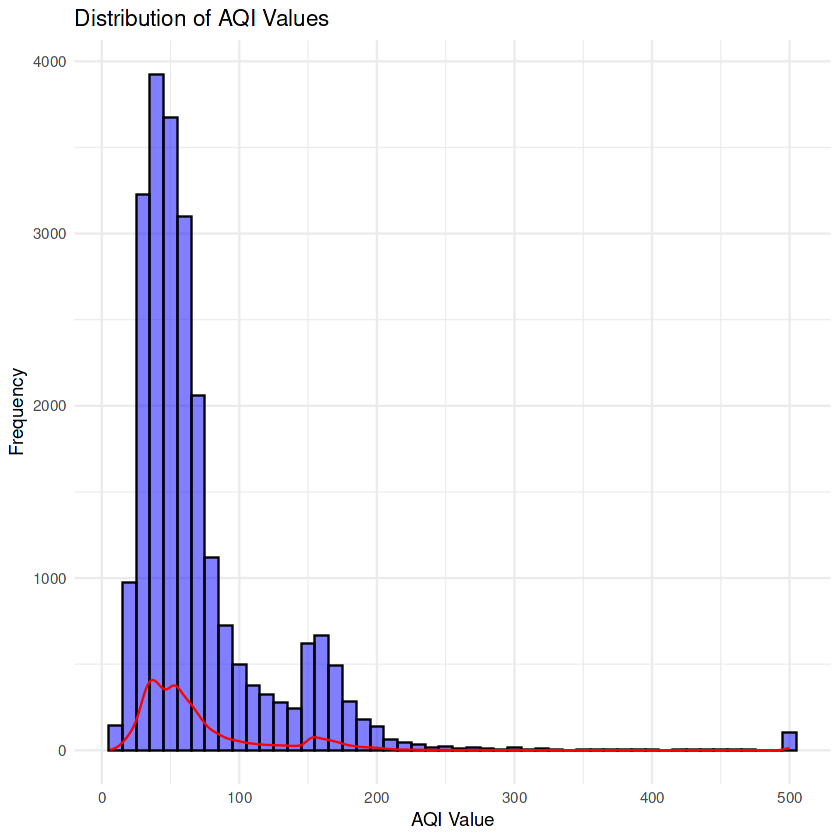

In [16]:
# Visualize the distribution of AQI values
ggplot(df, aes(x = `AQI Value`)) +
  geom_histogram(binwidth = 10, color = "black", fill = "blue", alpha = 0.5) +
  geom_density(aes(y = ..count..), color = "red") +
  labs(title = "Distribution of AQI Values", x = "AQI Value", y = "Frequency") +
  theme_minimal()


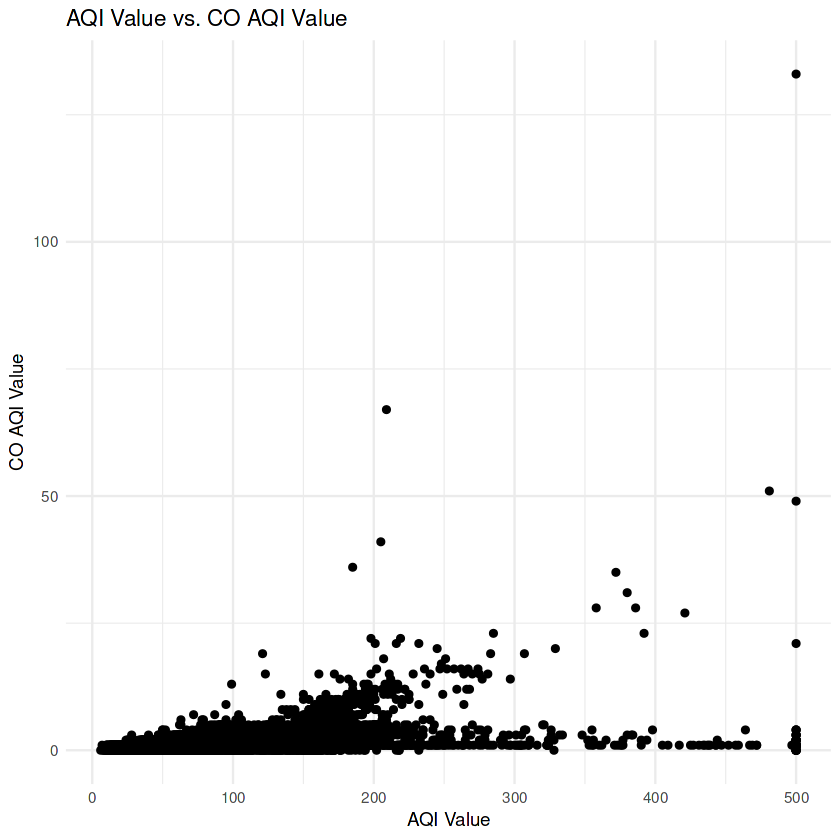

In [17]:
# Plot the relationship between AQI Value and CO AQI Value
ggplot(df, aes(x = `AQI Value`, y = `CO AQI Value`)) +
  geom_point() +
  labs(title = "AQI Value vs. CO AQI Value", x = "AQI Value", y = "CO AQI Value") +
  theme_minimal()


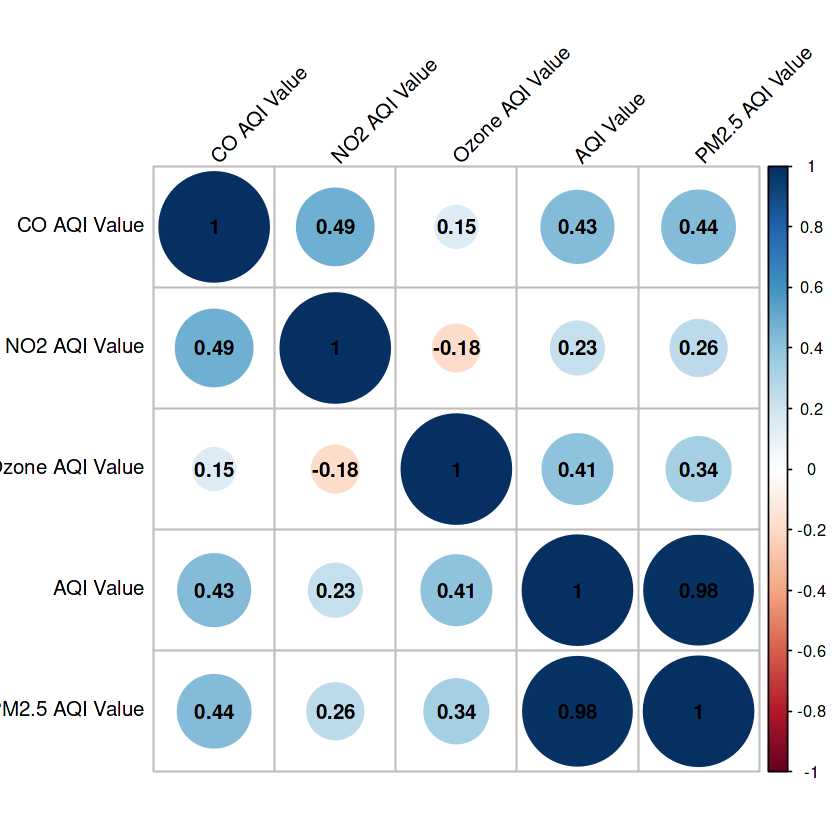

In [18]:
# Calculate and visualize the correlation matrix for numeric columns
correlation_matrix <- cor(df[numeric_cols], use = "complete.obs")

# Create a correlation plot
corrplot(correlation_matrix, method = "circle", type = "full", order = "hclust", 
         tl.col = "black", tl.srt = 45, addCoef.col = "black")
